# Binary Classified Data Program by David Smolinski
What this adds to my portfolio:
- object oriented programming (OOP)
- class
- instance method (regular method)
- class variable, instance variable
- namedtuple
- inheritance, subclass
Summary: 
I made classes and methods for common tasks when visualizing binary classified data.

Links:
- [my portfolio](https://github.com/DavidSmolinski/portfolio)
- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)
- [the csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv)

In [10]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from collections import namedtuple

In [11]:
class BiClassifiedDf:
    """for binary classified data visualization with pandas dataframe"""

    def __init__(self, df, bi_col, bi_val_label1, bi_val_label2):
        """
        :param df: dataframe
        :param bi_col: string, binary column
        :param bi_val_label1: tuple, (val, label) for one val in bi_col
        :param bi_val_label2: tuple, (val, label) for the other val in bi_col
        """
        self.df = df
        self.bi_col = bi_col
        self.bi_val_label1 = bi_val_label1
        self.bi_val_label2 = bi_val_label2

    def binary_df_groups(self, col):
        """takes a dataframe column and groups rows based on a binary col
        :param col: string, the non-binary df column
        :return: a list of 2 df series grouped by the binary col vals
        """
        DfGroups = namedtuple('DfGroups', 'group1, group2')
        df, bi_col = self.df, self.bi_col
        bi_val1, bi_label1 = self.bi_val_label1
        bi_val2, bi_label2 = self.bi_val_label2
        return DfGroups(group1=df.loc[df[bi_col] == bi_val1, col], group2=df.loc[df[bi_col] == bi_val2, col])

    def describe_cols(self):
        """For every column other than the binary one(bi_col) group data and print pandas describe()"""
        _, label1 = self.bi_val_label1
        label2 = self.bi_val_label2[1]
        cols = self.df.columns.values.tolist()
        for col in cols:
            if col != self.bi_col:
                group1, group2 = self.binary_df_groups(col)
                print(f'\n{col} {label1}\n{group1.describe()}')
                print(f'\n{col} {label2}\n{group2.describe()}')


class BiPlots(BiClassifiedDf):
    """matplotlib plots
    class vars:
    file_extension = '.png'
    save_plot = False
    row_units = 'quantity'
    """
    file_extension = '.png'
    save_plot = False
    row_units = 'quantity'

        def __show_or_save(self, filename):
        if self.save_plot is False:
            plt.show()
            plt.clf()
        else:
            plt.savefig(filename + self.file_extension)

    def hist(self, col):
        """a histogram for the 2 df groups made by binary_df_groups
        :param col: column for x axis
        """
        _, label1 = self.bi_val_label1
        label2 = self.bi_val_label2[1]
        group1, group2 = self.binary_df_groups(col)
        plt.hist(group1, alpha=.5, bins=9, label=label1)
        plt.hist(group2, alpha=.5, bins=9, label=label2)
        plt.legend()
        plt.xlabel(col)
        plt.ylabel(self.row_units)
        plt.title(f'{col} vs {label1} and {label2}')
        filename = f'{col} vs {label1} and {label2} hist'
        self.__show_or_save(filename)

    def box_plot(self, col):
        """a box plot for the 2 df groups made by binary_df_groups
        :param col: column for x axis
        """
        _, label1 = self.bi_val_label1
        label2 = self.bi_val_label2[1]
        group1_group2 = self.binary_df_groups(col)
        plt.boxplot(group1_group2, showfliers=True,
                    widths=.9)
        plt.xticks([1, 2], [label1, label2])
        plt.title(f'{col} vs {label1} and {label2}')
        plt.ylabel(col)
        filename = f'{col} vs {label1} and {label2} Box Plot'
        self.__show_or_save(filename)

In [12]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv', delimiter=',')
df = df.rename(columns={'Classification': 'has_cancer'})

In [13]:
bi_df = BiPlots(df=df, bi_col='has_cancer', bi_val_label1=(1, 'cancer-'), bi_val_label2=(2, 'cancer+'))
BiPlots.row_units = 'people'

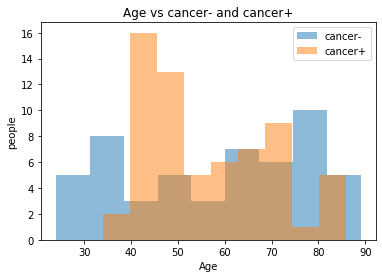

<Figure size 432x288 with 0 Axes>

In [14]:
bi_df.hist('Age')

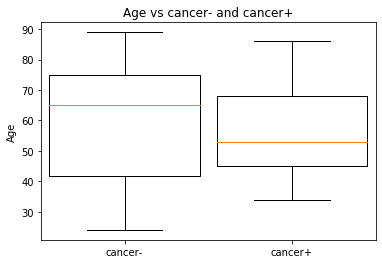

<Figure size 432x288 with 0 Axes>

In [15]:
bi_df.box_plot('Age')

In [16]:
bi_df.describe_cols()


Age cancer-
count    52.000000
mean     58.076923
std      18.957999
min      24.000000
25%      41.750000
50%      65.000000
75%      75.000000
max      89.000000
Name: Age, dtype: float64

Age cancer+
count    64.000000
mean     56.671875
std      13.493155
min      34.000000
25%      45.000000
50%      53.000000
75%      68.000000
max      86.000000
Name: Age, dtype: float64

BMI cancer-
count    52.000000
mean     28.317336
std       5.427465
min      18.670000
25%      23.096003
50%      27.694389
75%      32.328091
max      38.578759
Name: BMI, dtype: float64

BMI cancer+
count    64.000000
mean     26.984740
std       4.620398
min      18.370000
25%      22.788722
50%      27.408027
75%      30.810069
max      37.109375
Name: BMI, dtype: float64

Glucose cancer-
count     52.000000
mean      88.230769
std       10.191529
min       60.000000
25%       82.750000
50%       87.000000
75%       93.250000
max      118.000000
Name: Glucose, dtype: float64

Glucose cancer+
count     64

dataset citations:

Miguel Patrício(miguelpatricio '@' gmail.com), José Pereira (jafcpereira '@' gmail.com), Joana Crisóstomo (joanacrisostomo '@' hotmail.com), Paulo Matafome (paulomatafome '@' gmail.com), Raquel Seiça (rmfseica '@' gmail.com), Francisco Caramelo (fcaramelo '@' fmed.uc.pt), all from the Faculty of Medicine of the University of Coimbra and also Manuel Gomes (manuelmgomes '@' gmail.com) from the University Hospital Centre of Coimbra